In [1]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification,AutoTokenizer,TFAutoModel,AutoModelForMaskedLM
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import numpy as np

In [2]:
data = pd.read_csv("email_classification.csv")

In [3]:
data.head()

,email,label
0,Upgrade to our premium plan for exclusive acce...,ham
1,Happy holidays from our team! Wishing you joy ...,ham
2,We're hiring! Check out our career opportuniti...,ham
3,Your Amazon account has been locked. Click her...,spam
4,Your opinion matters! Take our survey and help...,ham


In [4]:
# Example text
example_text = data['email']  # Assuming 'email' is the column name containing the email text
label=data['label']

In [5]:
# Tokenizer does not take data frame so we convert it into list of string
example_text.tolist()

['Upgrade to our premium plan for exclusive access to premium content and features.',
 'Happy holidays from our team! Wishing you joy and prosperity this season.',
 "We're hiring! Check out our career opportunities and join our dynamic team.",
 'Your Amazon account has been locked. Click here to verify your account information.',
 'Your opinion matters! Take our survey and help us enhance your experience.',
 'Your payment has been received. Thank you for your prompt transaction.',
 'Your email account storage is full. Click here to upgrade your account.',
 "Dear [Name], thank you for subscribing to our newsletter. Here's your welcome gift!",
 'Your account has been credited with loyalty points. Redeem them for exciting rewards!',
 "You've been chosen for a free iPhone. Click here to claim your prize!",
 "Don't miss out on our special offer! Sign up now and get a discount on your first purchase.",
 "We're hiring interns for the summer. Apply now and gain valuable experience.",
 "You're 

In [6]:

import torch
from transformers import AutoTokenizer, AutoModelForMaskedLM

# List of email sentences
email_sentences = data['email'].tolist()


# Load pre-trained tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")  # You can replace "bert-base-uncased" with any other LLM model
model = AutoModelForMaskedLM.from_pretrained("bert-base-uncased")

# Tokenize and encode the email sentences
tokenized_input = tokenizer(email_sentences, return_tensors="pt", padding=True, truncation=True)

# Forward pass through the model to get hidden states
with torch.no_grad():
    outputs = model(**tokenized_input)

# Extract the hidden states from the output
last_hidden_states = outputs[0]

# Aggregate hidden states across the sequence dimension (dimension 1)
# Here, we'll take the mean across the sequence dimension
mean_last_hidden_states = torch.mean(last_hidden_states, dim=1)

# Print the shape of the aggregated hidden states
print("Shape of the aggregated hidden states:", mean_last_hidden_states.shape)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Shape of the aggregated hidden states: torch.Size([179, 30522])


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [9]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(mean_last_hidden_states, label, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm = SVC()

# Train SVM on the train set
svm.fit(X_train, y_train)
# Predict labels for train and test sets
train_predictions = svm.predict(X_train)
test_predictions = svm.predict(X_test)

# Calculate accuracy on train and test sets
train_accuracy_svm = accuracy_score(y_train, train_predictions)
test_accuracy_svm = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy_svm)
print("Test Accuracy:", test_accuracy_svm)



Test Accuracy: 0.9722222222222222
Test Accuracy: 0.9722222222222222


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming you have your email embeddings stored in mean_last_hidden_states
# and your labels in a list called labels

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(mean_last_hidden_states, label, test_size=0.2, random_state=42)

# Initialize kNN classifier with k=5 (you can adjust k as needed)
knn = KNeighborsClassifier(n_neighbors=5)

# Train kNN on the train set
knn.fit(X_train, y_train)

# Predict labels for train and test sets
train_predictions = knn.predict(X_train)
test_predictions = knn.predict(X_test)

# Calculate accuracy on train and test sets
train_accuracy_knn= accuracy_score(y_train, train_predictions)
test_accuracy_knn = accuracy_score(y_test, test_predictions)

print("Train Accuracy:", train_accuracy_knn)
print("Test Accuracy:", test_accuracy_knn)


Train Accuracy: 0.9370629370629371
Test Accuracy: 0.9444444444444444


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming you have your email embeddings stored in mean_last_hidden_states
# and your labels in a list called labels

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(mean_last_hidden_states, label, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Train Decision Tree on the train set
decision_tree.fit(X_train, y_train)

# Predict labels for train and test sets
train_predictions = decision_tree.predict(X_train)
test_predictions = decision_tree.predict(X_test)

# Calculate accuracy on train and test sets
train_accuracy_decision_tree = accuracy_score(y_train, train_predictions)
test_accuracy_decision_tree = accuracy_score(y_test, test_predictions)

print("Train Accuracy:", train_accuracy_decision_tree)
print("Test Accuracy:", test_accuracy_decision_tree)


Train Accuracy: 1.0
Test Accuracy: 0.9722222222222222


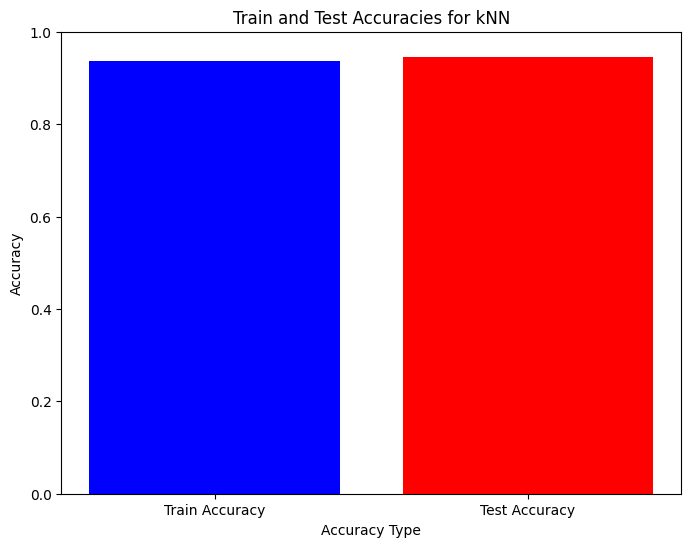

In [14]:
import matplotlib.pyplot as plt

# Sample data (replace with actual data)

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy_knn, test_accuracy_knn], color=['blue', 'red'])
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracies for kNN')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()
